In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cycler
from matplotlib.gridspec import GridSpec
import svgutils
import svgutils.transform as sg
import sys 
import kwant

from ipynb.fs.full.bbh_disclination import create_disclination, compute_observables_disclination, C4_defect_trf
from ipynb.fs.full.bbh_parametric import create_parametric, compute_observables_parametric

In [2]:
font = {"size": 11}
matplotlib.rc("font", **font)
matplotlib.rcParams["figure.dpi"] = 72 * 3
matplotlib.rcParams['axes.prop_cycle'] = cycler.cycler('color', ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"])
cycler_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Figure 2

In [3]:
L = 10
params_list_disclination = [dict(g=0.5, l=1, d=0, alpha_g=1, alpha_l=1, alpha_d=1, trf=C4_defect_trf), 
                            dict(g=0.5, l=1, d=0.1, alpha_g=1, alpha_l=1, alpha_d=1, trf=C4_defect_trf)
                            ]

PATHS_disclination = ['data/disclination_L_{}_g_{}_l_{}_d_{}_ag_{}_al_{}_ad_{}'.format(L,
                                                                                params['g'],
                                                                                params['l'],
                                                                                params['d'],
                                                                                params['alpha_g'],
                                                                                params['alpha_l'],
                                                                                params['alpha_d']
                                                                               )
                     for params in params_list_disclination]

params_list_parametric = [dict(g_cx=1, g_cy=1, g_r=1, d=0, phi0=0, c=0, disorder=0, salt='1'), 
                          dict(g_cx=1, g_cy=1, g_r=1, d=0.1, phi0=0, c=0, disorder=0, salt='1')
                         ]

PATHS_parametric = ['data/parametric_L_{}_gcx_{}_gcy_{}_gr_{}_phi0_{}_c_{}_d_{}_disorder_{}'.format(L,
                                                                                  params['g_cx'],
                                                                                  params['g_cy'],
                                                                                  params['g_r'],
                                                                                  params['phi0'],
                                                                                  params['c'],
                                                                                  params['d'],
                                                                                  params['disorder']
                                                                               )
                   for params in params_list_parametric]

In [4]:
# generate data (diagonalize Hamiltonian)
sysf_disclination, transformed_sysf_disclination = compute_observables_disclination(L, params_list_disclination, E_Fermi=-0.5)
sysf_parametric = compute_observables_parametric(L, params_list_parametric, E_Fermi=-0.5)

len(hopping_keep_1)=30, len(hopping_keep_2)=0
100 400


In [5]:
paths = [PATHS_parametric[0],
        PATHS_disclination[0],
        PATHS_parametric[1],
        PATHS_disclination[1]
        ]

(
    PATH_param_with_chiral, PATH_disc_with_chiral,
    PATH_param_without_chiral, PATH_disc_without_chiral
) = paths

In [6]:
abs_charges = [
    np.load(path + "/abs_charge.npy")[:-end] for path, end in zip(paths, [5, 1, 5, 1])
]

cond_charges = [
    np.load(path + "/cond_charge.npy")[:-end] for path, end in zip(paths, [5, 1, 5, 1])
]

d_s = [
    np.load(path + "/d.npy")[:-end] for path, end in zip(paths, [5, 1, 5, 1])
]

debug1
debug2
debug3
debug4
debug5


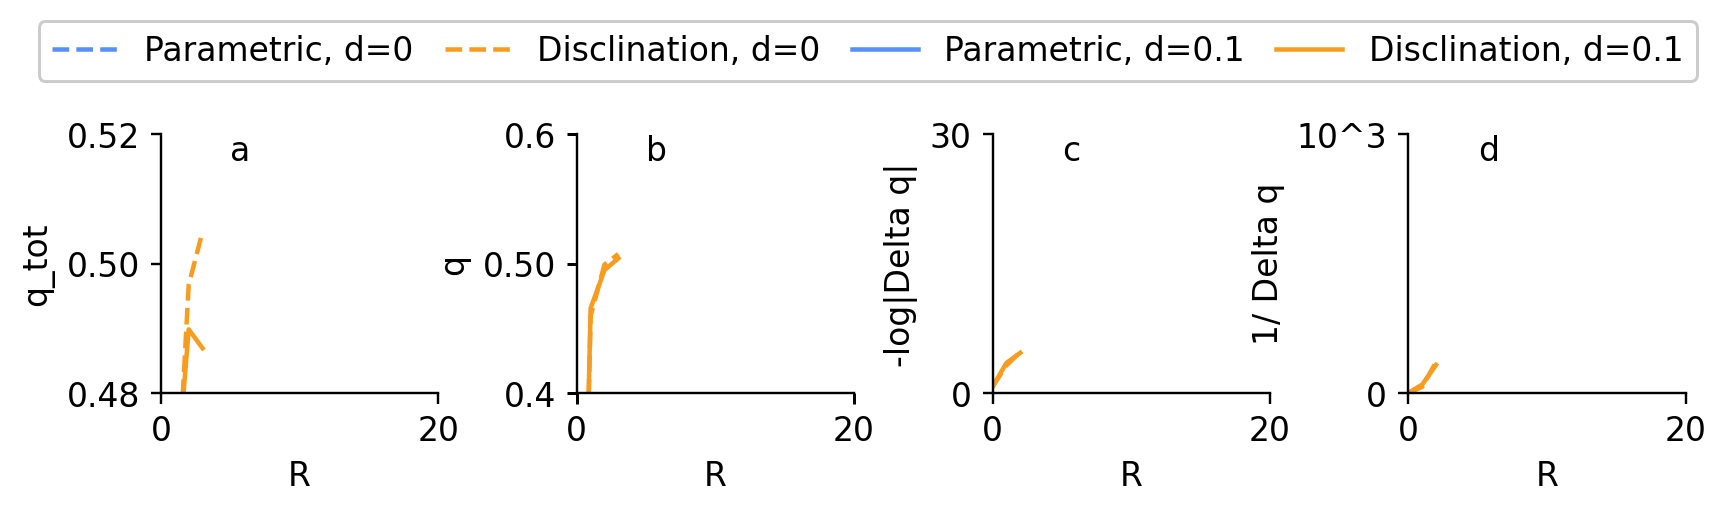

In [12]:
fig2, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(7.05826, 1.2))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=1.02)

s = 2

labels = [
    'Parametric, d=0',
    'Disclination, d=0',
    'Parametric, d=0.1',
    'Disclination, d=0.1',
]
colors = 2 * cycler_colors[:2]
linestyles = ["--", "--", "-", "-"]

for d, cond_charge, color, label, linestyle in zip(d_s, cond_charges, colors, labels, linestyles):
    ax0.plot(d, cond_charge, color=color, label=label, linestyle=linestyle)
ax0.set_xlim(0, 20)
ymin, ymax = 0.48, 0.52
ax0.set_ylim(ymin, ymax)
ax0.set_yticks([ymin, 0.5, ymax])
ax0.set_yticklabels("0.48 0.50 0.52".split())
ax0.set_ylabel('q_tot')
ax0.set_xlabel('R')
ax0.spines["bottom"].set_position(("data", 0.5 - 0.02))

print("debug1")

ax0.legend(
    loc='upper center',
    bbox_to_anchor=(-0.5, 1.3, 6.1, 0.2),
    mode="expand", ncol = 4, facecolor='white', framealpha=1
)

for d, abs_charge, color, linestyle in zip(d_s, abs_charges, colors, linestyles):
    ax1.plot(d, abs_charge, color=color, linestyle=linestyle)

print("debug2")
    
ax1.set_ylabel('q')
ax1.set_xlabel('R')
ax1.set_yticks([0.4, 0.50, 0.6])
ax1.set_yticklabels("0.4 0.50 0.6".split())
ax1.set_ylim([0.4, 0.6])
ax1.tick_params(width=1)

for d, abs_charge, color, linestyle in zip(d_s, abs_charges, colors, linestyles):
    ax2.plot(d[:-1], -np.log(np.diff(abs_charge)), color=color, linestyle=linestyle)

print("debug3")

ax2.set_xlim(0, 20)
ax2.set_ylabel('-log|Delta q|')
ax2.set_xlabel('R')
ax2.set_ylim([0, 30])
ax2.set_yticks([0, 30])
ax2.set_yticklabels("0 30".split())

for d, abs_charge, color, linestyle in zip(d_s, abs_charges, colors, linestyles):
    ax3.plot(d[:-1], 1/(np.diff(abs_charge)), color=color, linestyle=linestyle)

print("debug4")

ax3.set_ylim(0, 1000)
ax3.set_yticks([0, 1000])
ax3.set_yticklabels("0 10^3".split())
ax3.set_xlim(0, 20)
ax3.set_ylabel('1/ Delta q')
ax3.set_xlabel('R')

for axes, panel_label in zip([ax0, ax1, ax2, ax3], "abcd"):
    axes.set_xlim([0, 20])
    axes.set_xticks([0, 20])
    axes.set_xticklabels("0 20".split())
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.text(
        0.25,
        0.9,
        fr"{panel_label}",
        transform=axes.transAxes,
        fontsize=11
    )
print("debug5")

fig2.show()
fig2.savefig('Figures/charge_convergence.svg', bbox_inches='tight')

## Figure 3

In [9]:
## generate system (no Hamiltonian diagonalization)
sysf_disclination, transformed_sysf_disclination = create_disclination(L)
sysf_parametric = create_parametric(L)

# load densities
densities_disclination = [np.load(path+'/density.npy') for path in PATHS_disclination]
densities_parametric = [np.load(path+'/density.npy') for path in PATHS_parametric]

len(hopping_keep_1)=30, len(hopping_keep_2)=0
100 400


/tmp/ipykernel_2950/845202764.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwant.plotter.density(
/tmp/ipykernel_2950/845202764.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwant.plotter.density(
/tmp/ipykernel_2950/845202764.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwant.plotter.density(
/tmp/ipykernel_2

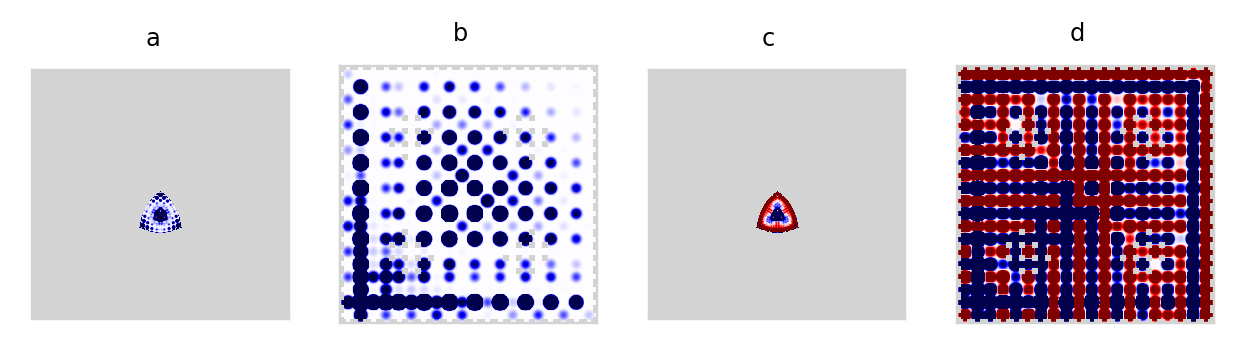

In [13]:
sysfs = 2*[transformed_sysf_disclination, sysf_parametric]
densities = [densities_disclination[0],
             densities_parametric[0],
             densities_disclination[1],
             densities_parametric[1]
            ]

fig3, axs = plt.subplots(1, 4, figsize=(7.05826, 1.6))
ax1, ax2, ax3, ax4 = axs

for ax, panel_label, sysf, density in zip(axs, "abcd", sysfs, densities):
    kwant.plotter.density(
        sysf,
        density - 0.5,
        vmin=-0.0005,
        vmax=0.0005,
        relwidth=0.06,
        cmap="seismic",
        background='lightgrey',
        ax=ax
    );
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['bottom'].set_color('lightgrey')
    ax.spines['top'].set_color('lightgrey')
    ax.spines['left'].set_color('lightgrey')
    ax.spines['right'].set_color('lightgrey')
    ax.text(
        0.44,
        1.1,
        fr"{panel_label}",
        transform=ax.transAxes,
        fontsize=8
    )
    
lim = 45
ax1.set_xlim([-lim, lim])
ax3.set_xlim([-lim, lim])
ax1.set_ylim([-lim+9, lim+6])
ax3.set_ylim([-lim+9, lim+6])

fig3.savefig('Figures/panel_defects_densities.svg', bbox_inches='tight')

## Figure 1

In [14]:
#create new SVG figure
figures_main_path = 'Figures/'

figures_paths = [
    figures_main_path+'BBHlattice.svg',
    figures_main_path+'phase_diagram.svg',
    figures_main_path+'disclination_lattice_viridis.svg',
    figures_main_path+'parametric_defect_lattice_viridis.svg'
]
# load matpotlib-generated figures

figs = [sg.fromfile(path) for path in figures_paths]

# get the plot objects
plots = [fig.getroot() for fig in figs]
wspace = 1.8
hspace = 0.3
txt_offset = 0.8
hlabel = 0.1
txts = []
for i, label, factor in zip(range(len(plots)), r'(a) (b) (c) (d)'.split(), [0.95, 0.95, 0.18, 0.18]):
    plots[i].moveto(0.1+i*wspace, hspace, scale_x=0.025*factor)
    txts.append(sg.TextElement(i*wspace + txt_offset, hlabel, label, size=0.15, font='latex'))

# append plots and labels to figure
fig1 = svgutils.compose.Figure("7.05826in", "1.9in", *plots, *txts)

# save generated SVG files
fig1.save(figures_main_path+'panel_model_and_defects.svg')

FileNotFoundError: [Errno 2] No such file or directory: 'Figures/BBHlattice.svg'